In [1]:
import pandas as pd
import warnings
import numpy as np
import scipy.stats as s
from scipy.stats import chisquare
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter('ignore')

## Base de Dados

In [9]:
nota = pd.read_excel(r"Data/notas_fatorial.xlsx", index_col='estudante')

In [10]:
nota.head(10)

,finanças,custos,marketing,atuária
estudante,,,,
Gabriela,5.8,4.0,1.0,6.0
Luiz Felipe,3.1,3.0,10.0,2.0
Patrícia,3.1,4.0,4.0,4.0
Gustavo,10.0,8.0,8.0,8.0
Letícia,3.4,2.0,3.2,3.2
Ovídio,10.0,10.0,1.0,10.0
Leonor,5.0,5.0,8.0,5.0
Dalila,5.4,6.0,6.0,6.0
Antônio,5.9,4.0,4.0,4.0


## Estatísticas Descritivas

In [11]:
nota.describe()

,finanças,custos,marketing,atuária
count,100.000000,100.000000,100.000000,100.000000
mean,5.834000,4.717000,5.668000,5.314000
std,3.122749,2.455999,2.828351,2.513078
min,0.600000,1.900000,1.000000,1.700000
25%,3.100000,2.900000,3.000000,3.200000
50%,5.800000,4.000000,6.000000,5.000000
75%,9.000000,6.000000,8.000000,7.025000
max,10.000000,10.000000,10.000000,10.000000


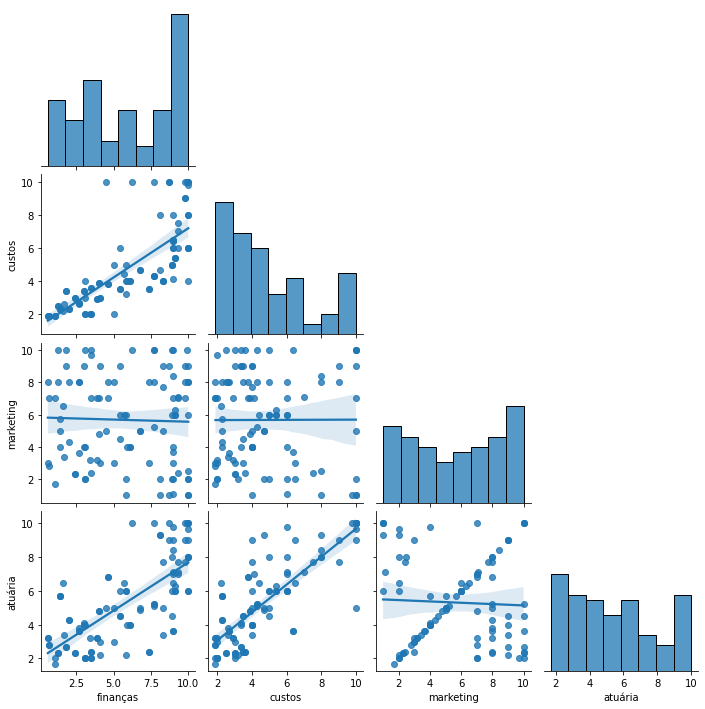

In [12]:
## Correlação entre variáveis
ax = sns.pairplot(nota, kind='reg', corner = True)
ax = ax

## Correlação

In [13]:
correlacao = nota.corr()
correlacao

,finanças,custos,marketing,atuária
finanças,1.000000,0.755550,-0.029531,0.710871
custos,0.755550,1.000000,0.002856,0.808092
marketing,-0.029531,0.002856,1.000000,-0.044346
atuária,0.710871,0.808092,-0.044346,1.000000


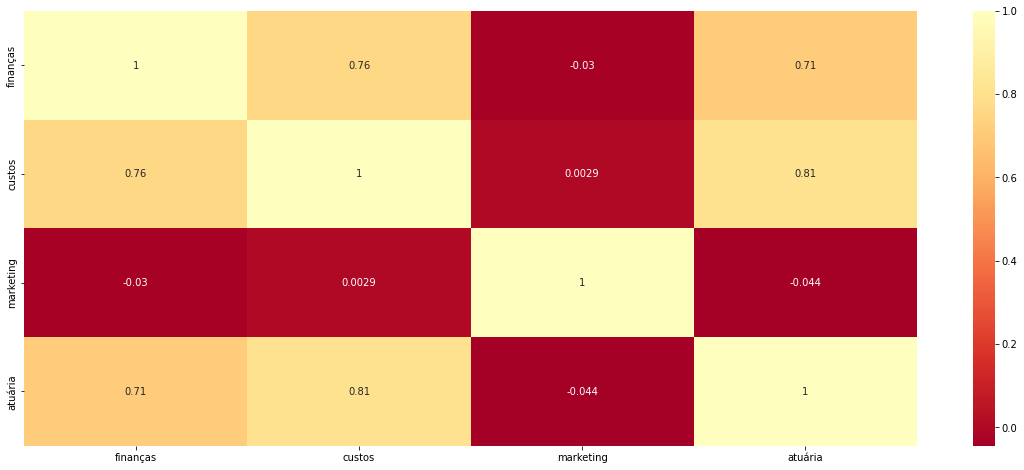

In [14]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(correlacao, annot= True, center=1, cmap='RdYlGn')
ax = ax

## Elaborando a Análise Fatorial por Componentes Principais PCA

### Teste de esfericidade

In [15]:
Qui2_Bartlett = -((nota.shape[0]-1)-(2*correlacao.shape[0]+5)/6)*np.log(np.linalg.det(correlacao))
Qui2_Bartlett

191.87909970380872

In [16]:
#graus de liberdade
df = nota.shape[1]*(nota.shape[1]-1)/2
df

6.0

In [17]:
pvalue = 1 -  s.chi2.cdf(Qui2_Bartlett, df)
pvalue

0.0

como o p valor deu menor que 5%, descartamos a hipótese nula de que a matriz de correlação é igual a matriz identidade

### Ajuste dos dados

In [18]:
znota = s.zscore(nota)
n = nota.shape[1]

In [19]:
pca = PCA(n_components=n, )

In [20]:
pca.fit(znota)

PCA(n_components=4)

### Encontrando AutoValores e AutoVetores

In [21]:
dvetores = pd.DataFrame(np.transpose(pca.components_), columns=['PC'+str(i+1) for i in range(pca.n_components)], index = nota.columns)

In [22]:
dvalores = pd.DataFrame(pca.explained_variance_, columns=['auto_valores'])
dvalores['peso']= pca.explained_variance_ratio_
dvalores['acm_pesos'] = 0
for i in range(dvalores.shape[0]):
    if (i==0):
        dvalores['acm_pesos'].iloc[i] = dvalores['peso'].iloc[i]
    else:
        dvalores['acm_pesos'].iloc[i] = dvalores['acm_pesos'].iloc[i-1]+dvalores['peso'].iloc[i]

In [23]:
dvalores

,auto_valores,peso,acm_pesos
0,2.543562,0.629532,0.629532
1,1.010484,0.250095,0.879627
2,0.300622,0.074404,0.954030
3,0.185735,0.045970,1.000000


In [24]:
dvetores.round(3)

,PC1,PC2,PC3,PC4
finanças,0.564,-0.007,-0.801,-0.202
custos,0.589,-0.049,0.220,0.777
marketing,-0.027,-0.999,0.001,-0.042
atuária,0.578,0.010,0.558,-0.595


### Scores Fatoriais

In [25]:
matriz_score = np.divide(dvetores,np.sqrt(dvalores['auto_valores']))
matriz_score.round(3)

,PC1,PC2,PC3,PC4
finanças,0.354,-0.007,-1.460,-0.468
custos,0.369,-0.048,0.400,1.802
marketing,-0.017,-0.994,0.001,-0.098
atuária,0.363,0.010,1.017,-1.382


### Cálculo dos fatores de cada observação

In [26]:
nota_transformada = pd.DataFrame(pca.fit_transform(znota), columns=dvetores.columns, index = nota.index)
nota_transformada.head(10)

,PC1,PC2,PC3,PC4
estudante,,,,
Gabriela,0.024172,1.673770,0.096231,-0.318691
Luiz Felipe,-1.717726,-1.510482,-0.187913,0.355856
Patrícia,-0.957243,0.607130,0.346554,0.287729
Gustavo,2.146365,-0.891490,-0.178821,0.097955
Letícia,-1.561913,0.926875,-0.089034,-0.164745
Ovídio,3.157225,1.561143,0.445263,0.362648
Leonor,-0.178089,-0.832617,0.170823,0.183749
Dalila,0.385718,-0.139558,0.380157,0.267532
Antônio,-0.448755,0.600746,-0.374850,0.105876


In [27]:
# mostrando ortogonalidade dos dados
nota_transformada.corr().round()

,PC1,PC2,PC3,PC4
PC1,1.0,0.0,0.0,0.0
PC2,0.0,1.0,-0.0,0.0
PC3,0.0,-0.0,1.0,0.0
PC4,0.0,0.0,0.0,1.0


### Cálculo da carga fatorial

In [28]:
correl_final = pd.concat([nota.iloc[:,], nota_transformada], axis=1, 
                         keys=['nota_transformada', 'nota']).corr().loc['nota_transformada', 'nota']

In [29]:
correl_final.round(3)

,PC1,PC2,PC3,PC4
finanças,0.895,-0.007,-0.437,-0.087
custos,0.934,-0.049,0.120,0.333
marketing,-0.042,-0.999,0.000,-0.018
atuária,0.918,0.010,0.304,-0.255


In [30]:
correl_final['comunalidade']=(correl_final**2).sum(axis=1).round(3)
correl_final
         

,PC1,PC2,PC3,PC4,comunalidade
finanças,0.895398,-0.007086,-0.436720,-0.086533,1.0
custos,0.934033,-0.048581,0.119783,0.332978,1.0
marketing,-0.042466,-0.998933,0.000358,-0.018170,1.0
atuária,0.917697,0.010133,0.304210,-0.255315,1.0


In [31]:
(correl_final**2).sum(axis=0).round(3)

PC1             2.518
PC2             1.000
PC3             0.298
PC4             0.184
comunalidade    4.000
dtype: float64

# Selecionando componentes a partir de autovalores maiores que 1

In [32]:
k = dvalores[dvalores['auto_valores']>1].shape[0]

pca = PCA(n_components=k, random_state=12345)
pca.fit(znota)
dvetores = pd.DataFrame(np.transpose(pca.components_), columns=['PC'+str(i+1) for i in range(pca.n_components)])
dvalores = pd.DataFrame(pca.explained_variance_, columns=['auto_valores'])
dvalores['peso']= pca.explained_variance_ratio_
dvalores['acm_pesos'] = 0
for i in range(dvalores.shape[0]):
    if (i==0):
        dvalores['acm_pesos'].iloc[i] = dvalores['peso'].iloc[i]
    else:
        dvalores['acm_pesos'].iloc[i] = dvalores['acm_pesos'].iloc[i-1]+dvalores['peso'].iloc[i]

In [33]:
dvalores

,auto_valores,peso,acm_pesos
0,2.543562,0.629532,0.629532
1,1.010484,0.250095,0.879627


In [34]:
dvetores

,PC1,PC2
0,0.564257,-0.007084
1,0.588604,-0.048571
2,-0.026761,-0.998743
3,0.578310,0.010131


In [35]:
nota_transformada = pd.DataFrame(pca.fit_transform(znota), columns=dvetores.columns, index = nota.index)
correl_final = pd.concat([nota, nota_transformada], axis=1, 
                         keys=['nota_transformada', 'nota']).corr().loc['nota_transformada', 'nota']

In [36]:
correl_final['comunalidade'] =(correl_final**2).sum(axis=1)
correl_final.round(3)

,PC1,PC2,comunalidade
finanças,0.895,-0.007,0.802
custos,0.934,-0.049,0.875
marketing,-0.042,-0.999,1.000
atuária,0.918,0.010,0.842


### Loading plot com cargas dos 'k' primeiros fatores

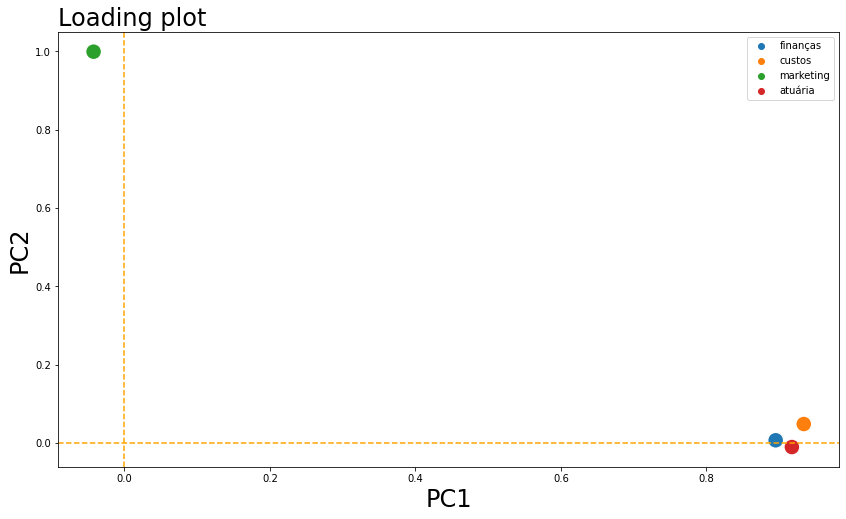

In [37]:
plt.figure(figsize=(14,8)) 
plt.axhline(c='orange', ls='--')
plt.axvline(c='orange', ls='--')
plt.ylabel('PC2', fontsize=24)
plt.xlabel('PC1', fontsize=24)
plt.title('Loading plot', fontsize = 24, loc='left')
ax = sns.scatterplot( x = correl_final['PC1'], y = -correl_final['PC2'], s=250, hue=correl_final.index)
ax = ax

In [38]:
nota_fatorial = pd.concat([nota, nota_transformada], axis=1)
nota_fatorial.head()

,finanças,custos,marketing,atuária,PC1,PC2
estudante,,,,,,
Gabriela,5.8,4.0,1.0,6.0,0.024172,1.673770
Luiz Felipe,3.1,3.0,10.0,2.0,-1.717726,-1.510482
Patrícia,3.1,4.0,4.0,4.0,-0.957243,0.607130
Gustavo,10.0,8.0,8.0,8.0,2.146365,-0.891490
Letícia,3.4,2.0,3.2,3.2,-1.561913,0.926875


In [39]:
nota_fatorial['score'] = nota_fatorial['PC1']*dvalores['peso'][0]- nota_fatorial['PC2']*dvalores['peso'][1]

In [40]:
nota_fatorial.head()

,finanças,custos,marketing,atuária,PC1,PC2,score
estudante,,,,,,,
Gabriela,5.8,4.0,1.0,6.0,0.024172,1.673770,-0.403384
Luiz Felipe,3.1,3.0,10.0,2.0,-1.717726,-1.510482,-0.703599
Patrícia,3.1,4.0,4.0,4.0,-0.957243,0.607130,-0.754455
Gustavo,10.0,8.0,8.0,8.0,2.146365,-0.891490,1.574162
Letícia,3.4,2.0,3.2,3.2,-1.561913,0.926875,-1.215080


In [41]:
nota_fatorial.sort_values(by='score', ascending=False)

,finanças,custos,marketing,atuária,PC1,PC2,score
estudante,,,,,,,
Adelino,9.9,10.0,10.0,10.0,3.053479,-1.632706,2.330593
Renata,7.7,10.0,10.0,10.0,2.653953,-1.627690,2.077824
Cecília,9.8,10.0,7.0,10.0,3.063847,-0.567786,2.070789
Felipe,8.7,10.0,9.0,9.0,2.613786,-1.279124,1.965364
Claudio,9.8,9.0,9.0,9.0,2.572682,-1.261756,1.935143
...,...,...,...,...,...,...,...
Elaine,3.1,2.0,2.0,2.0,-1.882518,1.348574,-1.522376
Carolina,3.1,2.0,2.0,2.0,-1.882518,1.348574,-1.522376
Ester,0.6,1.9,3.0,3.2,-2.092586,1.006226,-1.569001
